### Google Drive Link:
- https://drive.google.com/file/d/1Cl01dYokbZwbrmEOfvN2ylRYHIGnSv4q/view

# Tasks:
- Prediction csv file on the data in correct file, using CIFAR10 model.
- All code needed to train run your network to produce that prediction from scratch, along with the instructions on how to run the code
- A short description of te approach you took and how you arrived the solution you did!

In [1]:
#https://docs.fast.ai/vision.html <- based on
from fastai.vision import *
from fastai import core

### Imports:
- fastai to work with computer vision, simplifie training and fast accurate neural networks (https://docs.fastai/vision.html) for more info.
- pandas and csv to manipulate csv files.
- PIL to work with images orientation.
- os to work with directories.
- torch to work with multi-dimensional matrix containing elements of data types (https://pytorch.org/docs/stable/tensors.html).

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import csv
import os
import torch as tr

### Creating image dataset
- 80% for training, 20% for testing

In [4]:
tfms = get_transforms(do_flip=False)
img_data = ImageDataBunch.from_csv(path = 'datasets/train/',
                                  ds_tfms=tfms, size=64,
                                  valid_pct= 0.2)

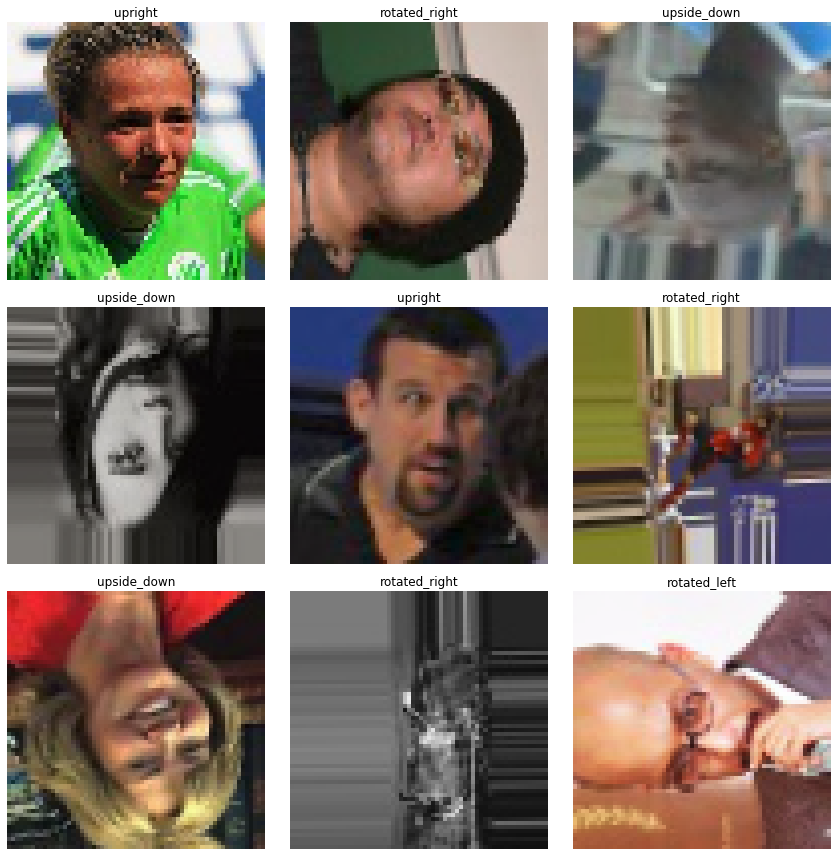

In [5]:
# looking images 
img_data.show_batch(rows=3)

In [6]:
# data info
img_data

ImageDataBunch;

Train: LabelList (39117 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
rotated_left,rotated_left,rotated_left,rotated_left,rotated_left
Path: datasets/train;

Valid: LabelList (9779 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
upside_down,rotated_left,upright,upside_down,upright
Path: datasets/train;

Test: None

In [7]:
# Neural Network Object - runs with ImageDataBunch
learn = cnn_learner(img_data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,accuracy,time
0,0.174648,0.096395,0.964516,01:44


### Detail: We got a 96% of accuracy

#### After train The NN, we need to classify the images

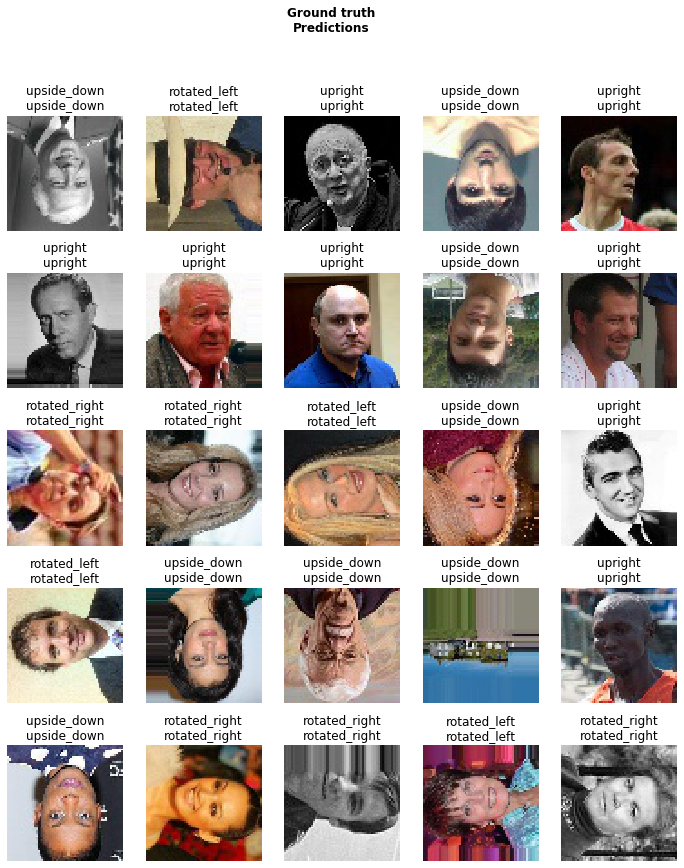

In [8]:
learn.show_results(rows=5, figsize=(12,14))

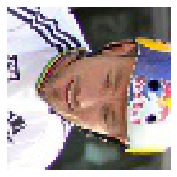

In [9]:
ex = vision.open_image('datasets/test/90-10303590_1983-01-26_2010.jpg').show()

In [10]:
# Predicting labels
learn.predict(ex)

(Category upside_down,
 tensor(3),
 tensor([7.9401e-07, 4.1759e-06, 4.0658e-05, 9.9995e-01]))

#### r = root, d = directories and f = tests

In [74]:
path = 'datasets/test/'

tests = []

for r, d, f, in os.walk(path):
    for file in f:
        if '.jpg' in file:
            tests.append(file)
for i in tests:
    print(f)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
type(tests[2])

str

####   
- making the right pattern
- classificate images in test.
- create a predict file in format csv, and use the classification in file: o for left, 1 for right, 2 for upright(right position) and upside_down.

In [99]:
with open(r'predict.csv','a') as f:
  writer = csv.writer(f)
  
  writer.writerow(['fn','label'])
  for i in range(len(tests)):
    #let's classificate the pictures in test/
    unlabelled_pic = vision.open_image('datasets/test/'+tests[i])
    prediction = learn.predict(unlabelled_pic)
    if(tr.equal(prediction[1],tr.tensor(0))):
       writer.writerow([tests[i],'rotated_left'])             
    elif(tr.equal(prediction[1],tr.tensor(1))):
         writer.writerow([tests[i],'rotated_right']) 
    elif(tr.equal(prediction[1],tr.tensor(2))):
         writer.writerow([tests[i],'upright'])
    else:
         writer.writerow([tests[i],'upside_down'])

#### Classpd for look a new file (predict.csv) 

In [100]:
Classpd = pd.read_csv('predict.csv')

In [101]:
Classpd.head()

,fn,label
0,94-33484294_1980-04-06_2010.jpg,upside_down
1,91-33707991_1992-11-28_2015.jpg,rotated_right
2,93-18502293_1989-06-16_2014.jpg,rotated_right
3,91-234991_1975-07-18_2006.jpg,rotated_right
4,91-2255191_1978-07-17_2009.jpg,rotated_right


### Rotating pictures and saving in a new directory using PIL Image

In [102]:
for i in range(len(tests)):
  NotRotatedImage = Image.open('datasets/test/'+tests[i])
  if(Classpd['label'][i]=='upside_down'):
    rotatedImage = NotRotatedImage.rotate(180)
  elif(Classpd['label'][i]=='rotated_right'):
    rotatedImage = NotRotatedImage.rotate(90)
  elif(Classpd['label'][i]=='rotated_left'):
    rotatedImage = NotRotatedImage.rotate(-90)
  else:
    rotatedImage = NotRotatedImage.rotate(0)
  rotatedImage.save('datasets/right_orientation/'+tests[i].replace('.jpg','.png'))

### Checking some images from the new directory for confirm if this NN algorithm is working!

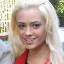

In [103]:
vision.open_image('datasets/right_orientation/90-10241990_1984-11-28_2007.png')

In [104]:
n = vision.open_image('datasets/right_orientation/90-10184590_1979-06-16_2006.png')

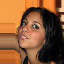

In [105]:
n

In [111]:
n1 = vision.open_image('datasets/right_orientation/90-10311690_1947-04-14_1940.png')

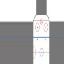

In [112]:
n1

In [113]:
learn.predict(n1)

(Category rotated_right,
 tensor(1),
 tensor([5.5657e-04, 9.9744e-01, 1.1886e-03, 8.1950e-04]))

In [114]:
from numpy import asarray